In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data
Dataset from [DicodingCollection](https://github.com/dicodingacademy/dicoding_dataset/tree/main/DicodingCollection)

- Tabel customers
- Tabel orders
- Tabel product
- Tabel sales

In [2]:
customer_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customer_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [3]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [4]:
products_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [5]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


## Assessing data


### Data customers_df

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


Hal ini menunjukkan adanya missing values pada kolom gender. 

2   gender         989 non-null    object

In [7]:
customer_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

Kode di atas akan menampilkan informasi terkait jumlah missing values yang terdapat output diatas.

Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [8]:
print("jumlah duplikasi data: ", customer_df.duplicated().sum())

jumlah duplikasi data:  6


Ketika menjalankan kode di atas, akan menemukan bahwa terdapat 6 data yang terduplikat.

Memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df.

In [9]:
customer_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


Jika diperhatikan, terdapat keanehan pada nilai maksimum yang terdapat pada kolom age. Ini kemungkinan besar terjadi karena adanya inaccurate value pada kolom tersebut.

max	1000.000000	700.000000	9998.000000

### Data orders_df

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


 Jumlah data pada orders_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom order_date & delivery_date. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada orders_df.

In [11]:
print('jumlah duplikasi data: ', orders_df.duplicated().sum())
orders_df.describe()

jumlah duplikasi data:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada orders_df. 

### Data product_df

In [12]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom dalam product_df.  Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada missing value di dalamnya.

memeriksa duplikasi dan ringkasan parameter statistik dari product_df.

In [13]:
print('jumlah duplikasi data: ', products_df.duplicated().sum())
products_df.describe()

jumlah duplikasi data:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


Berdasarkan gambar di atas, dapat dilihat bahwa terdapat 6 data yang terduplikasi pada product_df.

### Data sales_df

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


Berdasarkan hasil di atas, tidak ada masalah pada tipe data tiap kolom dalam sales_df. Namun, terdapat keanehan pada jumlah data pada kolom total_price. Hal ini menunjukkan adanya missing value pada kolom tersebut. 

In [15]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

Kode di atas akan menunjukkan jumlah missing value dari setiap kolom dalam sales_df.

Berdasarkan hasil di atas, dapat disimpulkan bahwa terdapat 19 missing value pada kolom total_price. 

memeriksa duplikasi dan ringkasan parameter statistik dari sales_df.

In [16]:
print('jumlah duplikasi data: ', sales_df.duplicated().sum())
sales_df.describe()

jumlah duplikasi data:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Hasil di atas menunjukkan bahwa tidak ada duplikasi pada sales_df. Selain itu, ia juga menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari sales_df.

Berikut merupakan rangkuman dari assessing data

<img title="a title" alt="Alt text" src="Screenshot (1018).png">

## Cleaning Data

### Clean Data customers_df

Menghilangkan duplicate data

In [17]:
customer_df.drop_duplicates(inplace=True)

In [18]:
print('jumlah duplikasi data: ', customer_df.duplicated().sum())

jumlah duplikasi data:  0


Menangani missing value

In [19]:
customer_df[customer_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


Berdasarkan output di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. 


kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut.

In [20]:
customer_df.gender.value_counts()

gender
Prefer not to say    725
Male                 143
Female               115
Name: count, dtype: int64

Berdasarkan hasil di atas, dapat diketahui bahwa nilai yang paling dominan dalam kolom gender ialah “Prefer not to say”. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value.

In [21]:
customer_df.fillna('Prefer not to say', inplace=True)

Untuk memastikan proses di atas berjalan dengan semestinya, kita bisa menjalankan kembali kode untuk mengidentifikasi missing value seperti berikut.

In [22]:
customer_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

Menangani inaccurate value

In [23]:
customer_df[customer_df.age == customer_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


Kode di atas akan menampilkan baris data yang memiliki nilai age maksimum.

Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai nol. Oleh karena itu, gantilah dengan nilai 70.

In [24]:
customer_df.age.replace(customer_df.age.max(), 70, inplace=True)

In [25]:
customer_df[customer_df.age == customer_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [26]:
customer_df.age.replace(customer_df.age.max(), 50, inplace=True)

In [27]:
customer_df[customer_df.age == customer_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [28]:
customer_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


Berdasarkan hasil tersebut dapat dilihat bahwa kolom age memiliki nilai maksimum yang cukup masuk akal. Selain itu, jika Ada perhatikan, nilai mean dan standard deviation ikut berubah setelah kita menangani inaccurate value tersebut.

### Clean Data orders_df

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom order_date & delivery_date.

In [29]:
date_time_columns = ['order_date', 'delivery_date']

for column in date_time_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

Kode di atas akan mengubah tipe data pada kolom order_date & delivery_date menjadi datetime.

In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


### Clean Data product_df

Sesuai hasil assessing data sebelumnya, kita mengetahui bahwa terdapat 6 data yang terduplikasi pada product_df. 

In [31]:
products_df.drop_duplicates(inplace=True)

In [32]:
print('jumlah duplikasi data: ', products_df.duplicated().sum())

jumlah duplikasi data:  0


### Clean Data sales_df

Berdasarkan hasil penilain data sebelumnya, diketahui bahwa terdapat 19 missing value pada kolom total_price. 

In [33]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


Kode di atas akan menampilkan semua baris data yang memiliki missing value pada kolom total_price seperti pada gambar berikut.

Berdasarkan tampilan data tersebut, kita menemukan bahwa nilai total_price merupakan hasil perkalian antara price_per_unit dan quantity. Kita dapat menggunakan pola ini untuk menangani missing value pada kolom total_price.

In [34]:
sales_df['total_price'] = sales_df['price_per_unit'] * sales_df['quantity']

Kode di atas akan mengatasi seluruh missing value serta memastikan nilai pada kolom total_price telah sesuai. 

In [35]:
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

## Exploratory Data Analysis

Tujuan

- membuat pertanyaan analisis atau bisnis yang ingin dicari jawabannya; dan
- melakukan eksplorasi terhadap setiap data untuk mencari insight menarik guna menjawab pertanyaan bisnis tersebut.

Alur Latihan

- Tahap persiapan.
- Tahap penentuan pertanyaan bisnis untuk explorasi data.
- Tahap eksplorasi data.

### Menentukan Pertanyaan Bisnis

sebuah contoh kasus dari perusahaan online fashion bernama Dicoding Collection atau disingkat DiCo. 

Sebagai perusahaan yang bergerak di bidang online fashion, DiCo perlu mengevaluasi performa penjualan (sales) dan memahami item fashion yang paling banyak dibeli. Selain itu, ia juga perlu lebih memahami pelanggannya (customer) sehingga dapat membuat sebuah strategi campaign yang lebih efisien.

Berdasarkan beberapa masalah tersebut, kita dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut.

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? 

### Eksplorasi Data customers_df

In [36]:
customer_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup luas mulai dari remaja hingga lanjut usia. 

Sekarang coba kita lihat demografi pelanggan berdasarkan jenis kelamin (gender). 

In [37]:
customer_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"] 
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

Kode di atas akan menghasilkan sebuah pivot table. Ia memuat informasi jumlah pelanggan (nunique dari customer_id) serta parameter umur yang dikelompokkan berdasarkan jenis kelamin.

Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang kita miliki didominasi oleh jenis kelamin prefer not to say. Di lain sisi, distribusi umur mereka ternyata cukup mirip yaitu berkisar antara 20 hingga 80 tahun.

Selanjutnya, kita coba melihat persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state). Untuk melakukannya kita juga akan menggunakan method groupby(). Selain itu, agar hasilnya lebih mudah untuk dilihat, kita akan mengurutkan nilainya menggunakan method sort_values() secara descending. Berikut contoh kode untuk melakukannya.

In [38]:
customer_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [39]:
customer_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota East Aidan, East Sophia, dan New Ava dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian South Australia.

### Eksplorasi Data orders_df 

Data kedua yang akan kita eksplor adalah orders_df. Ia mengandung berbagai informasi terkait sebuah order yang terdiri dari order_id, customer_id, order_date, dan delivery_date. Berdasarkan informasi tersebut, kita bisa membuat sebuah kolom baru untuk memuat waktu pengiriman tiap order. Untuk melakukannya, kita perlu menghitung selisih antar delivery_date dan order_date serta menyimpannya sebagai delivery_time. Selanjutnya, kita akan menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery_time menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja. Berikut merupakan contoh kode untuk melakukan semua proses tersebut.

In [40]:
delivery_time = orders_df['delivery_date'] - orders_df['order_date']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df['delivery_time'] = round(delivery_time/86400)

In [41]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


In [42]:
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari. 

### Eksplorasi Data orders_df dan customers_df

Jika Anda perhatikan, pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “status” pada data customers_df. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali.

In [43]:
customer_id_in_orders_df = orders_df.customer_id.to_list()
customer_df['status'] = customer_df['customer_id'].apply(lambda x: 'Active' if x in customer_id_in_orders_df else 'Not Active')
customer_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
202,203,fulan 203,Prefer not to say,30,765 Christiansen ParkwaySuite 557,8856,Lake Elijah,Australian Capital Territory,Australia,Active
470,470,fulan 470,Prefer not to say,45,2115 Henry GroveSuite 788,3138,Edwardtown,Western Australia,Australia,Active
99,100,fulan 100,Prefer not to say,69,093 Jessica AvenueSuite 154,768,Lake Callumville,Queensland,Australia,Active
310,311,fulan 311,Prefer not to say,25,316 Violet LaneApt. 212,2929,Fayburgh,Northern Territory,Australia,Active
722,720,fulan 720,Prefer not to say,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia,Not Active


Untuk memperoleh informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”, kita bisa menggunakan pivot table.

In [44]:
customer_df.groupby(by="status").customer_id.count()

status
Active        617
Not Active    384
Name: customer_id, dtype: int64

Seperti yang terlihat pada pivot table di atas, terdapat cukup banyak pelanggan yang belum pernah melakukan transaksi sebelumnya. Ini tentunya merupakan kabar buruk bagi kita karena hampir 30% pelanggan kita belum pernah melakukan order sebelumnya.

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge. 

In [45]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

In [46]:
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


Pada kode di atas, kita melakukan proses merge dengan metode “left”. Tentunya Anda masih ingat bukan dengan metode tersebut. Yap, betul sekali metode ini memungkinkan kita untuk mengambil semua nilai dari tabel kiri serta nilai yang bersesuaian dengan tabel kanan. 

Terdapat banyak sekali informasi yang bisa kita eksplore dari data di atas. Berikut merupakan beberapa hal yang bisa dijelajahi.

- Jumlah order berdasarkan kota

In [47]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


Nah, berdasarkan hasil tersebut, diketahui bahwa kota Jordanside dan New Ava merupakan dua kota yang memiliki jumlah order terbanyak.

- Jumlah order berdasarkan state

In [48]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Australian Capital Territory    118
Victoria                        118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

Berdasarkan pivot table tersebut, diketahui bahwa South Australia merupakan state yang balik banyak melakukan order.

- Jumlah order berdasarkan gender

In [49]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

Berdasarkan hasil tersebut, dapat dilihat bahwa kebanyakan order dilakukan oleh pelanggan yang berjenis kelamin prefer not to say. Hal ini tentunya sejalan dengan jumlah pelanggan yang kebanyakan dari kelompok gender tersebut.

- Jumlah order berdasarkan kelompok usia

Untuk melakukan hal ini, kita perlu mendefinisikan sebuah kolom baru bernama “age_group”. Kolom ini akan membantu kita dalam mengelompokkan pelanggan ke dalam tiga kelompok, yaitu youth, adults, dan seniors. 

In [50]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x < 24 else ("Senior" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults    697
Senior    226
Youth      77
Name: order_id, dtype: int64

Berdasarkan hasil tersebut diketahui bahwa pelanggan yang paling banyak melakukan order berasal dari kelompok usia Adults.

### Eksplorasi Data product_df dan sales_df

In [51]:
products_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [52]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Berdasarkan hasil tersebut, dapat dilihat bahwa harga barang yang dijual berkisar antara 90 hingga 119 dolar. Selain itu, kita juga memperoleh informasi lain yang tidak kalah menarik yaitu pada setiap transaksi pelanggan paling banyak membeli tiga buah item dalam satu jenis produk dengan total harga sebesar 357 dolar. 

Produk dengan harga termahal dan termurah

In [53]:
products_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk berdasarkan tipe dan nama produknya.

In [54]:
products_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [55]:
products_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

Pivot table di atas dapat memberikan kita gambaran terkait produk yang dijual oleh Dicoding Collection. Sebagai calon praktisi data yang Andal, tentunya Anda penasaran dengan produk yang paling laris. Nah, untuk menjawab pertanyaan ini, kita perlu menyatukan (merge) tabel product_df dan sales_df dengan kode berikut.

In [56]:
sales_products_df = pd.merge(
    left=sales_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

In [57]:
sales_products_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan kembali, hasil dari proses merge di atas memiliki perbedaan antara nilai price_per_unit dan price. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, dan biaya lainnya. 

Oke, sekarang kita coba melihat informasi penjualan produk berdasarkan tipenya.

In [58]:
sales_products_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Jika Anda perhatikan pivot table di atas, Trousers merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan. 

membuat pivot table yang sama untuk melihat informasi penjualan berdasarkan nama produk 

In [59]:
sales_products_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


Berdasarkan pivot table tersebut, diketahui bahwa produk Denim merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.  

### Exsplorasi data all

Hmm…, jika diperhatikan data penjualan ini cukup menarik untuk ditelusuri lebih dalam. Hal ini dilakukan guna melihat pola pembelian berdasarkan demografi pelanggan. Oleh karena itu, kita perlu membuat sebuah DataFrame baru bernama all_df untuk menampung semua informasi dari keempat tabel yang kita miliki. 

In [60]:
all_df = pd.merge(
    left=sales_products_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior


Selanjutnya, mari kita coba lihat preferensi pembelian berdasarkan state pelanggan dan tipe produk

In [61]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya. Jika diperhatikan, tipe produk Jacket (garis merah) paling banyak terjual pada negara bagian Queensland, South Australia, dan New South Wales.

melakukan hal yang sama untuk mengetahui selera tipe produk pelanggan berdasarkan gender dan kelompok usia. 

In [62]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [63]:
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2344       250536
          Shirt               2285       233841
          Trousers            2328       236880
Senior    Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               222        23531
          Shirt                241        24782
          Trousers             266        26823

pivot table di atas dapat memberikan kita gambaran terkait selera tipe produk pelanggan berdasarkan gender dan kelompok usia.

## Visualisasi data dan Explanatory data

- menjawab seluruh pertanyaan analisis atau bisnis yang sebelumnya telah dibuat; dan
- membuat visualisasi data untuk mempermudah penyampaian hasil analisis data.

Alur Latihan

- Persiapan.
- Membuat visualisasi data yang menjawab pertanyaan bisnis.

Pada materi Latihan Exploratory Data Analysis, kita telah mendefinisikan beberapa pertanyaan bisnis seperti berikut.

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

### Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

Untuk menjawab pertanyaan pertama, kita perlu membuat sebuah DataFrame baru untuk menampung informasi terkait jumlah order dan total revenue yang diperoleh pada tiap bulannya. Oleh karena itu, kita perlu mengubah frekuensi dari data yang awalnya harian menjadi bulanan.

In [64]:
mothly_orders_df = all_df.resample('M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})

mothly_orders_df.index = mothly_orders_df.index.strftime('%Y-%m')
mothly_orders_df = mothly_orders_df.reset_index()
mothly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

mothly_orders_df.head()

,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,95080
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


Pada kode di atas, kita ingin melakukan resample data order_date menjadi bulanan serta melakukan agregasi terhadap data tersebut untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh tiap bulan

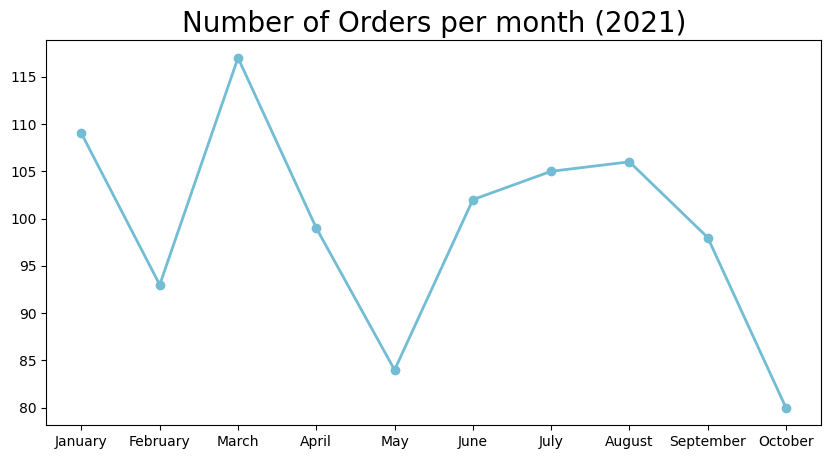

In [65]:
monthly_orders_df = all_df.resample('M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df['order_date'], monthly_orders_df['order_count'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Number of Orders per month (2021)', loc='center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan Maret. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Februari, April, Mei, dan Oktober. 

Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan. Untuk memvalidasi hal ini, buatlah line chart menggunakan contoh kode berikut.

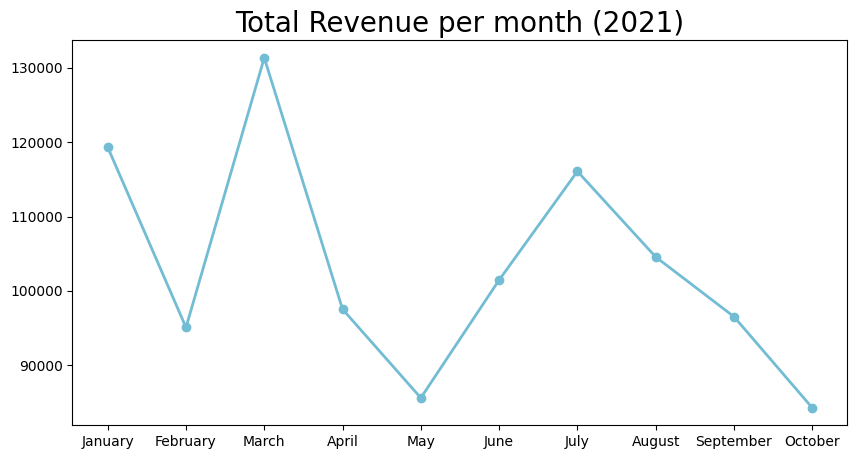

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df['order_date'],
    monthly_orders_df['revenue'],
    marker='o',
    linewidth=2,
    color='#72BCD4'
)

plt.title('Total Revenue per month (2021)', loc='center', fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

Penurunan jumlah orderan yang sangat signifikan terjadi pada bulan Februari, April, Mei, dan Oktober berdampak terhadap penurunan revenue perusahaan. Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll. Namun, untuk studi kasus ini, kita tidak memiliki cukup informasi terkait hal tersebut.

### Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

Pada pertanyaan bisnis selanjutnya, kita ingin mengidentifikasi produk dengan penjualan terbanyak dan paling sedikit. Untuk melakukan ini, tentunya kita harus membuat sebuah DataFrame baru guna menampung informasi terkait jumlah penjualan tiap produk. 

In [67]:
sum_order_item_df = all_df.groupby(by="product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_item_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


untuk mempermudah orang lain dalam mengidentifikasi produk dengan performa terbaik dan terburuk, kita perlu membuat dua buah visualisasi data dalam satu gambar visual. Untuk melakukan ini, gunakanlah function subplot().

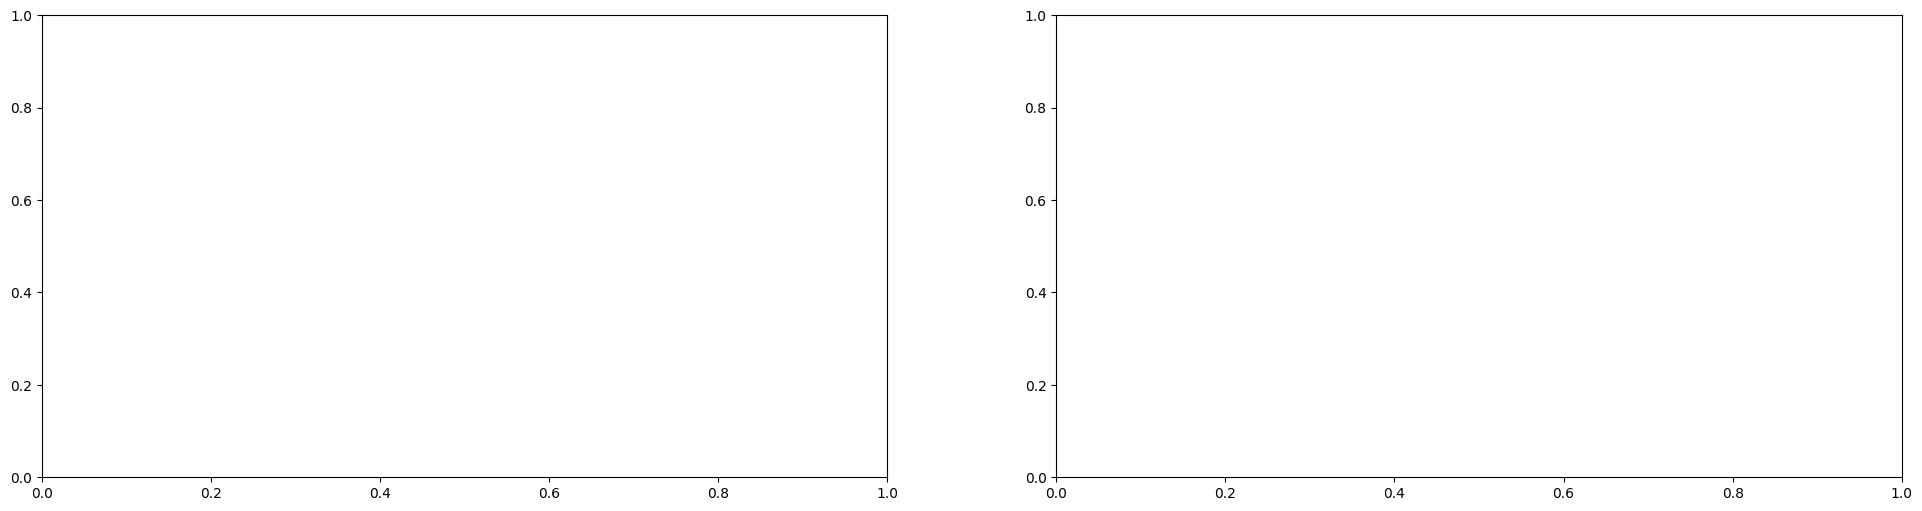

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\3680126829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity_x', y='product_name', data=sum_order_item_df.head(5), palette=colors, ax=ax[0])
C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\3680126829.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity_x', y='product_name', data=sum_order_item_df.sort_values(by='quantity_x', ascending=True).head(5), palette=colors, ax=ax[1])


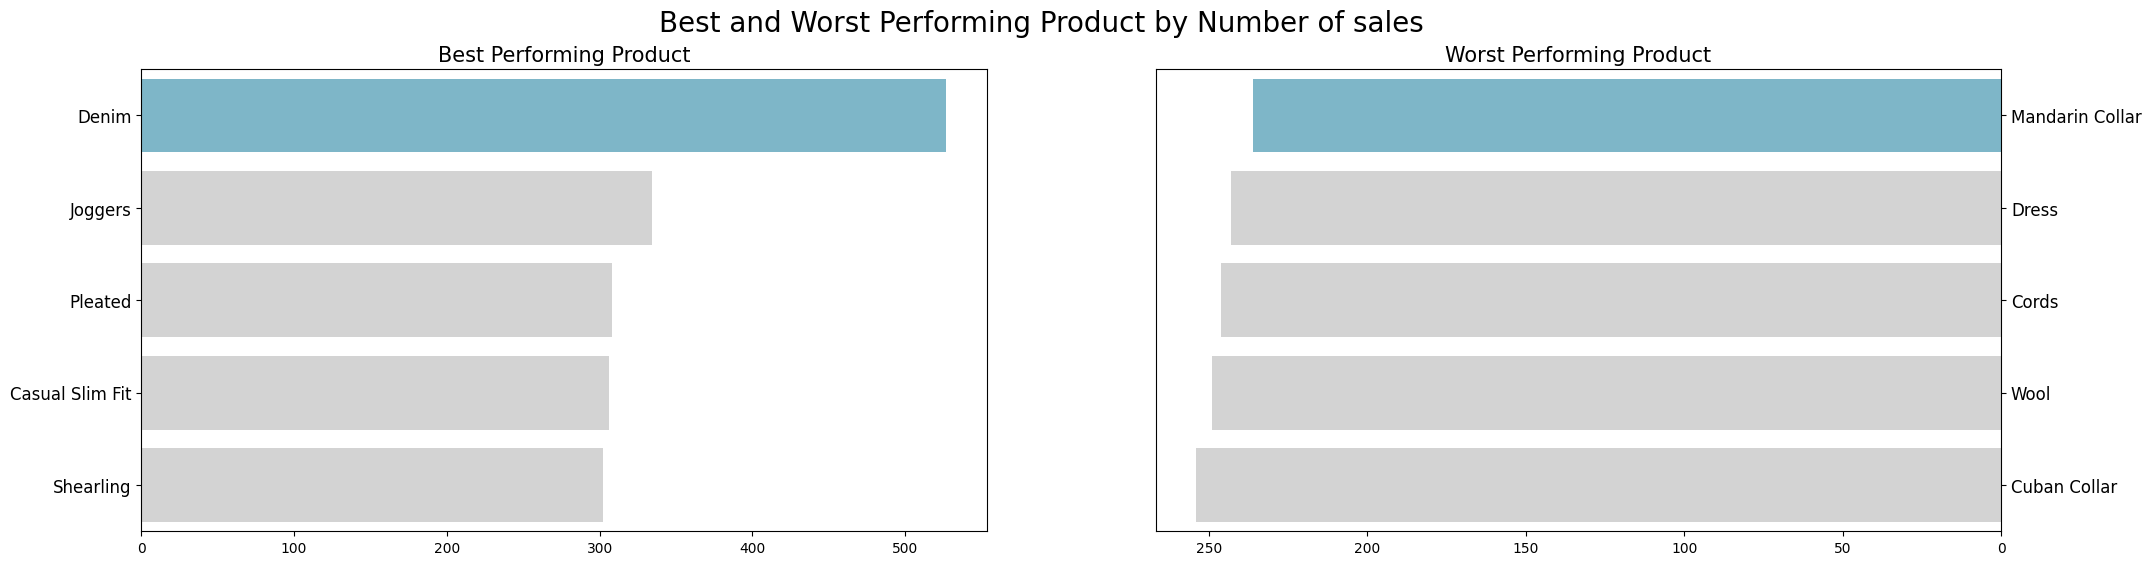

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(x='quantity_x', y='product_name', data=sum_order_item_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='quantity_x', y='product_name', data=sum_order_item_df.sort_values(by='quantity_x', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best and Worst Performing Product by Number of sales', fontsize=20)
plt.show()

Pada kode di atas, kita mengisi kanvas sebelumnya dengan bar chart yang dibuat menggunakan library seaborn. ax[0] merupakan object untuk kanvas pertama (bagian kiri) dan ax[1] merupakan object untuk kanvas kedua (bagian kanan). 

Berdasarkan gambar di atas, Anda dapat melihat bahwa produk Denim merupakan produk yang paling laris. Kontras dengan hal tersebut, produk Mandarin Collar merupakan produk yang paling sedikit terjual. 

### Bagaimana Demografi Pelanggan yang Kita Miliki?

Pertanyaan selanjutnya yang ingin kita jawab ialah terkait demografi pelanggan yang kita miliki. Untuk menjawab hal ini, tentunya kita bisa membuat DataFrame baru untuk menampung informasi terkait jumlah pelanggan untuk demografi tertentu seperti gender, state, dll.

- Berdasarkan gender

C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\4208120768.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\4208120768.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


Text(0, 0.5, '')

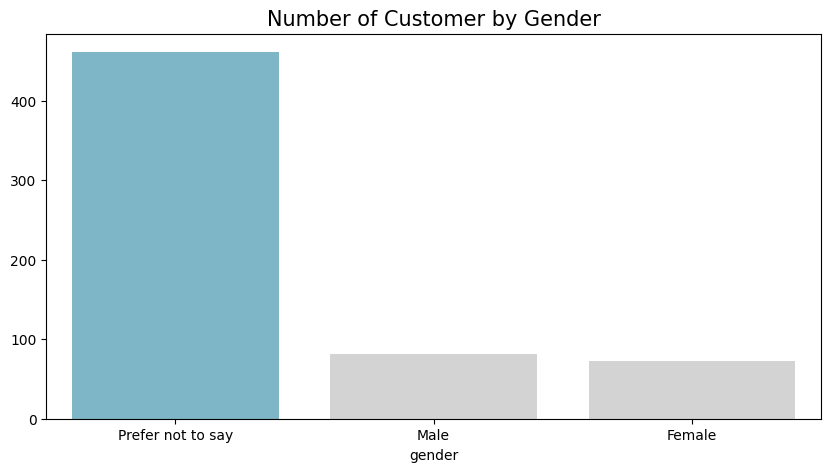

In [70]:
bygender_df = all_df.groupby(by='gender').customer_id.nunique().reset_index()
bygender_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y='customer_count',
    x='gender',
    data=bygender_df.sort_values(by='customer_count', ascending=False),
    palette=colors
)

plt.title('Number of Customer by Gender', loc='center', fontsize=15)

plt.ylabel(None)

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan tidak bersedia untuk memberitahukan informasi terkait gender-nya.

- Berdasarkan age

Untuk melihat demografi pelanggan berdasarkan usia, kita bisa mengelompokkannya sesuai kelompok usia. Selanjutnya, kita bisa memvisualisasikan hasil pengelompokkan tersebut.

C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\3296213472.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\3296213472.py:13: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


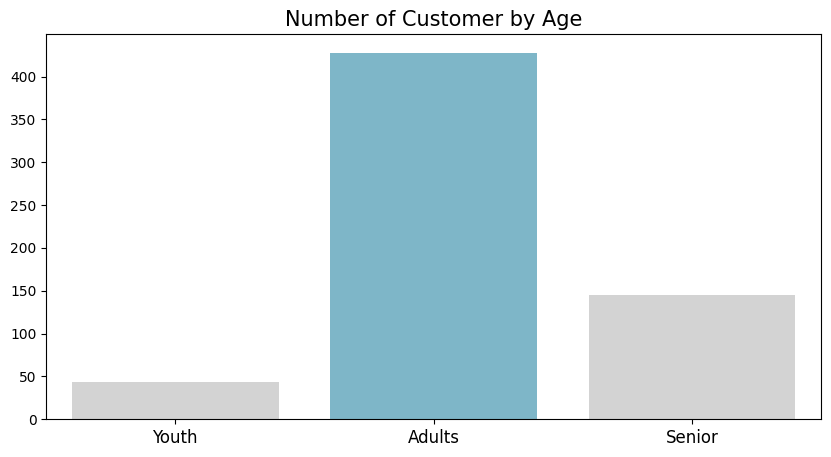

In [71]:
byage_df = all_df.groupby(by='age_group').customer_id.nunique().reset_index()

byage_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

byage_df

byage_df['age_group'] = pd.Categorical(byage_df['age_group'], categories=['Youth', 'Adults', 'Senior'])
plt.figure(figsize=(10, 5))
colors_ = ['#D3D3D3', '#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(
    y='customer_count',
    x='age_group',
    data=byage_df.sort_values(by='age_group', ascending=False),
    palette=colors_
)

plt.title('Number of Customer by Age', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Seperti yang bisa Anda lihat, pelanggan yang kita miliki didominasi oleh kelompok usia dewasa.

- Berdasarkan state

C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\413663538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


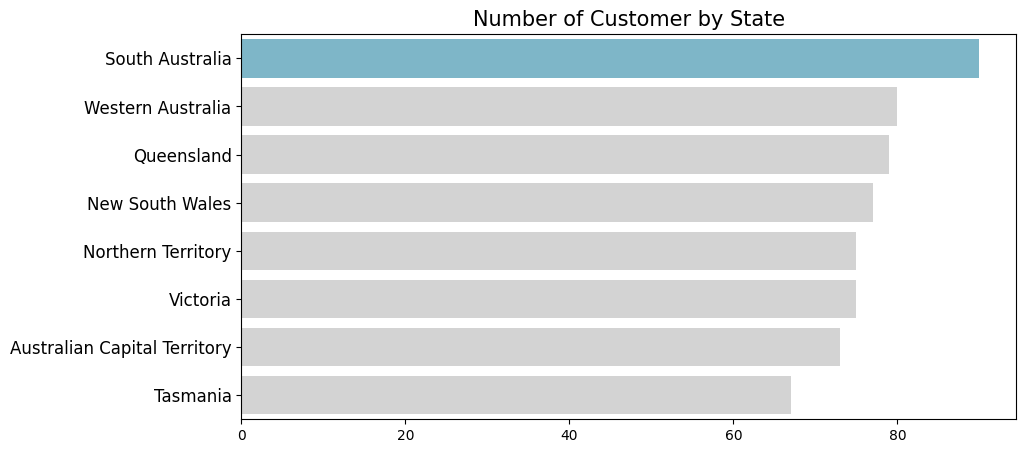

In [72]:
bystate_df = all_df.groupby(by='state').customer_id.nunique().reset_index()

bystate_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

bystate_df

plt.figure(figsize=(10, 5))

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x='customer_count',
    y='state',
    data=bystate_df.sort_values(by='customer_count', ascending=False),
    palette=colors_
)

plt.title('Number of Customer by State', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari negara bagian South Australia.

- RFM Analysis

Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

Nah, berdasarkan tiga parameter tersebut, kita bisa mengidentifikasi pelanggan mana yang memiliki high value (sering melakukan transaksi dan menghasilkan revenue yang besar) dan low value. 

In [73]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_date': 'max', # menghitung tanggal order terakhir
    'order_id': 'nunique', # menghitung jumlah order
    'total_price': 'sum' # menghitung jumlah revenue yang di hasilkan
})

rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_date'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


Nah, pada tahap ini Anda dapat mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy menggunakan kode berik

C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\1210342829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\1210342829.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\Azis Sukmawan\AppData\Local\Temp\ipykernel_6140\1210342829.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

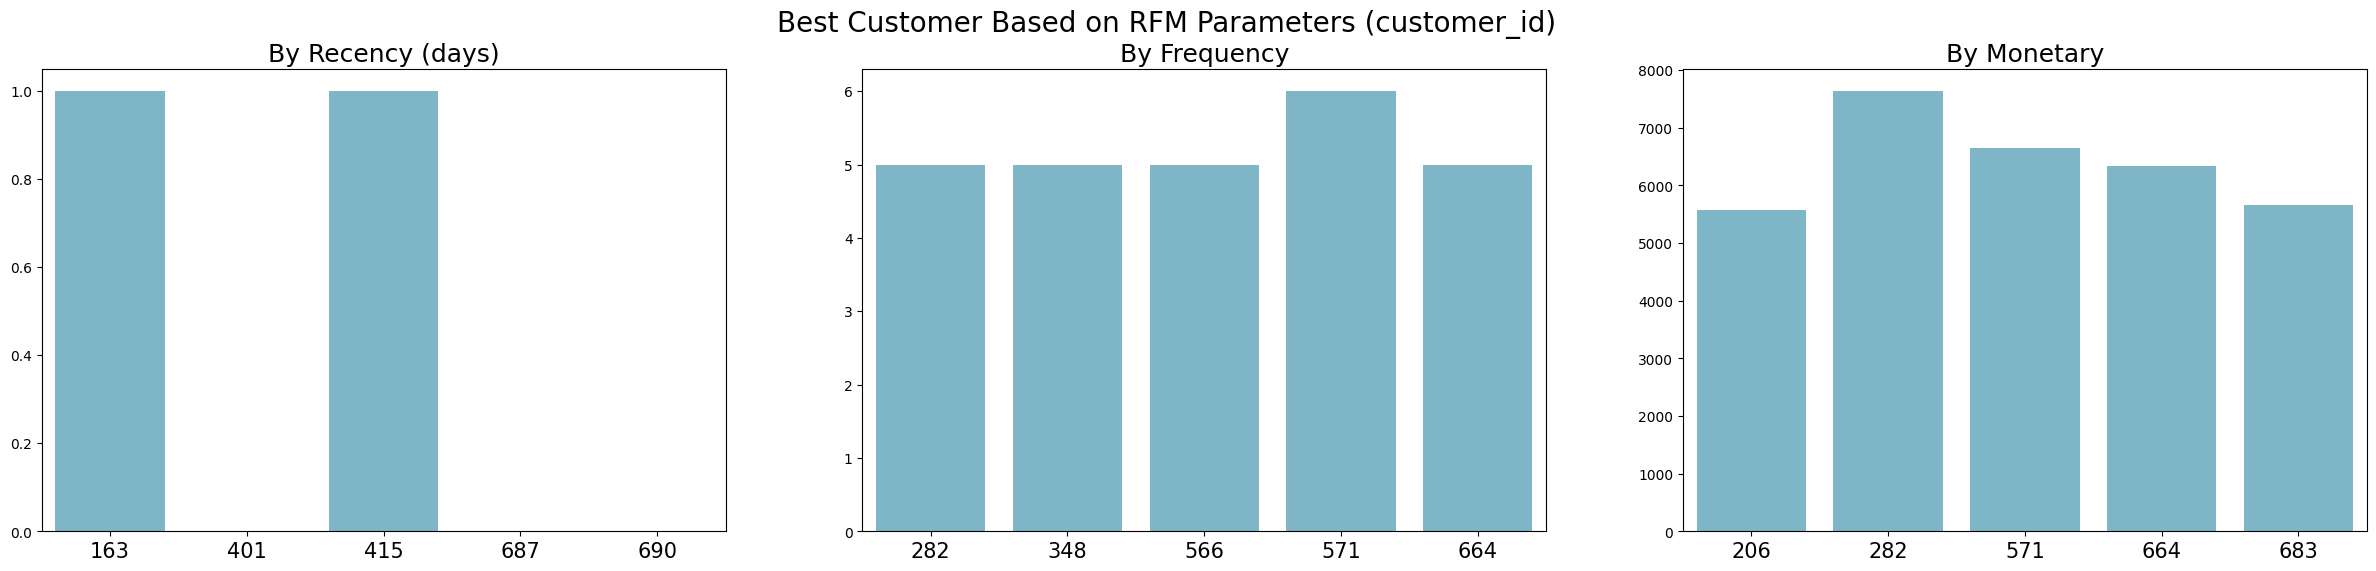

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [75]:
all_df.to_csv('../all_df.csv', index=False)